## Task

1. Define a non-homogeneous linear ODE.
2. Solve the homogeneous part first.
3. Apply the method of variation of constants to find the particular solution.
4. Verify the result using `sympy.dsolve`.

## General Solution

$$ \frac{dy}{dt} + 2y = 4e^t $$

Variation of constants method:
$ y(t) = y_h(t) + y_p(t) $

### Homogeneous solution:
$$ 2y_h(t) + \dot{y_h}(t) = 0 $$
$$ \frac{dy_h}{dt} = -2y_h $$
$$ \frac{dy_h}{y_h} = -2 dt $$
$$ \ln|y_h| = -2t + C $$
$$ y_h(t) = Ce^{-2t} $$

### Variation of constants:
$$ y_p(t) = C(t)e^{-2t} $$
$$ \dot{y}_p(t) = \dot{C}(t)e^{-2t} - 2C(t)e^{-2t} $$

### Substituting into the original ODE:
$$ \dot{C}(t)e^{-2t} - 2C(t)e^{-2t} + 2C(t)e^{-2t} = 4e^t $$
$$ \dot{C}(t)e^{-2t} = 4e^t $$
$$ \dot{C}(t) = 4e^{3t} $$
$$ C(t) = \int 4e^{3t} dt = \frac{4}{3}e^{3t} + D $$

So the general solution is:
$$ y(t) = Ce^{-2t} + \left(\frac{4}{3}e^{3t} + D\right)e^{-2t} $$

$$ y(t) = Ce^{-2t} + \frac{4}{3}e^{t} + De^{-2t} $$
$$ y(t) = (C + D)e^{-2t} + \frac{4}{3}e^{t} $$
$$ y(t) = Ae^{-2t} + \frac{4}{3}e^{t} $$
where $A = C + D $ is an arbitrary constant.



In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.typing import ArrayLike, NDArray

# 1. Define Symbols
t = sp.symbols("t", real=True)
y = sp.Function("y")(t)

# 2. Define the ODE
# Left Hand Side (LHS) = Right Hand Side (RHS)
# y' + 2y = 4*exp(t)
lhs = y.diff(t) + 2 * y
rhs = 4 * sp.exp(t)
ode = sp.Eq(lhs, rhs)

print("Target ODE:")
display(ode)

Target ODE:


Eq(2*y(t) + Derivative(y(t), t), 4*exp(t))

In [3]:
sol = sp.dsolve(ode)
print("General solution:")
display(sol)

General solution:


Eq(y(t), C1*exp(-2*t) + 4*exp(t)/3)

## Particular Solution





In [4]:
t0 = 0
y0 = 0

In [5]:
initial_conditions = {y.subs(t, t0): y0}
sol = sp.dsolve(ode, y, ics=initial_conditions)
sol = sol.simplify()

print(f"Particular symbolic solution for y(t) with y({t0})={y0}:")
display(sol)

Particular symbolic solution for y(t) with y(0)=0:



Eq(y(t), (4*exp(3*t) - 4)*exp(-2*t)/3)

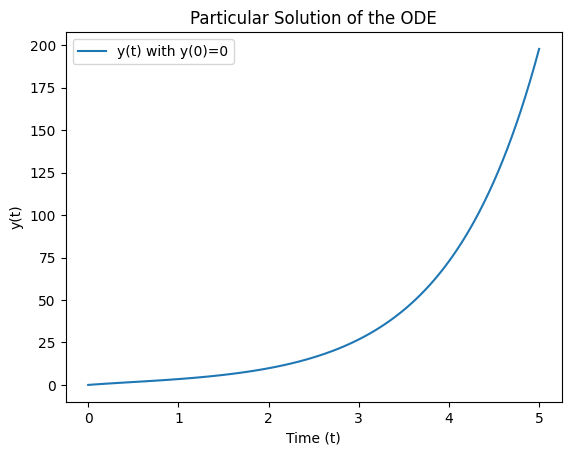

In [6]:
t_values = np.linspace(0, 5, 100)
y_func = sp.lambdify(t, sol.rhs, "numpy")
y_values = y_func(t_values)


plt.plot(t_values, y_values, label=f"y(t) with y({t0})={y0}")
plt.title("Particular Solution of the ODE")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.show()

## Stability Analysis

$$ \frac{dy}{dt} + 2y = 4e^t $$
$$ y(t) = Ae^{-2t} + \frac{4}{3}e^{t} $$

## Nullclines:

$$ 0 = 2y - 4e^t $$
$$ y = 2e^t $$

## Steady States:

$$ t \to \infty \implies y_h \to 0 $$
$$ y = y_p $$
$$ A = 0 $$
$$ y = y_p = \frac{4}{3}e^t $$


In [7]:
def system(
    t: ArrayLike,
    y: ArrayLike,
) -> tuple[NDArray, NDArray]:
    dt = np.ones_like(t)  # Time derivative of t is 1
    dy = 4 * np.exp(t) - 2 * y  # From the ODE: y' = 4*exp(t) - 2*y
    return dt, dy

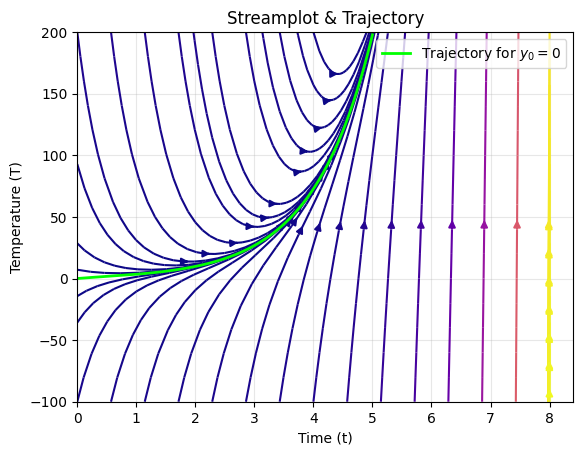

In [16]:
plt.figure()

t_grid = np.linspace(0, 8, 1000)
y_grid = np.linspace(-100, 200, 1000)
t_mesh, y_mesh = np.meshgrid(t_grid, y_grid)
dt_mesh, dy_mesh = system(t_mesh, y_mesh)

plt.streamplot(
    t_mesh,
    y_mesh,
    dt_mesh,
    dy_mesh,
    density=0.5,
    color=np.hypot(dt_mesh, dy_mesh),
    cmap="plasma",
    linewidth=1.5,
    broken_streamlines=False,
)


# Plot the specific trajectory we calculated earlier
t_track = np.linspace(0, 5, 1000)
y_lam = sp.lambdify(t, sol.rhs, "numpy")
y_track_vals = y_lam(t_track)
plt.plot(
    t_track,
    y_track_vals,
    "-",
    linewidth=2,
    label=f"Trajectory for $y_0={y0}$",
    color="lime",
)

plt.title("Streamplot & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# nullclines
# y = 2e^t
initial_conditions = {y.subs(t, t0): 2}
sol_nullclines = sp.dsolve(ode, y, ics=initial_conditions)
sol_nullclines = sol_nullclines.simplify()

# steady state
# y = y_p
initial_conditions = {y.subs(t, t0): 4 / 3}
sol_steady = sp.dsolve(ode, y, ics=initial_conditions)
sol_steady = sol_steady.simplify()

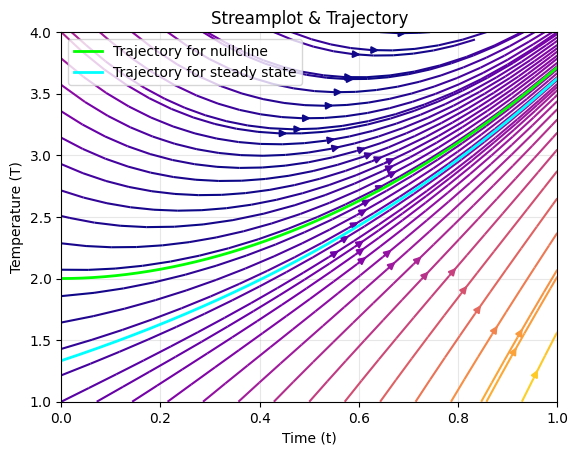

In [14]:
plt.figure()

t_grid = np.linspace(0, 1, 1000)
y_grid = np.linspace(1, 4, 1000)
t_mesh, y_mesh = np.meshgrid(t_grid, y_grid)
dt_mesh, dy_mesh = system(t_mesh, y_mesh)

plt.streamplot(
    t_mesh,
    y_mesh,
    dt_mesh,
    dy_mesh,
    density=0.5,
    color=np.hypot(dt_mesh, dy_mesh),
    cmap="plasma",
    linewidth=1.5,
    broken_streamlines=False,
)


# Plot the specific trajectory we calculated earlier
t_track = np.linspace(0, 1, 1000)
y_lam = sp.lambdify(t, sol_nullclines.rhs, "numpy")
y_track_vals = y_lam(t_track)
plt.plot(
    t_track,
    y_track_vals,
    "-",
    linewidth=2,
    label=f"Trajectory for nullcline",
    color="lime",
)

y_lam = sp.lambdify(t, sol_steady.rhs, "numpy")
y_track_vals = y_lam(t_track)
plt.plot(
    t_track,
    y_track_vals,
    "-",
    linewidth=2,
    label=f"Trajectory for steady state",
    color="cyan",
)


plt.title("Streamplot & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

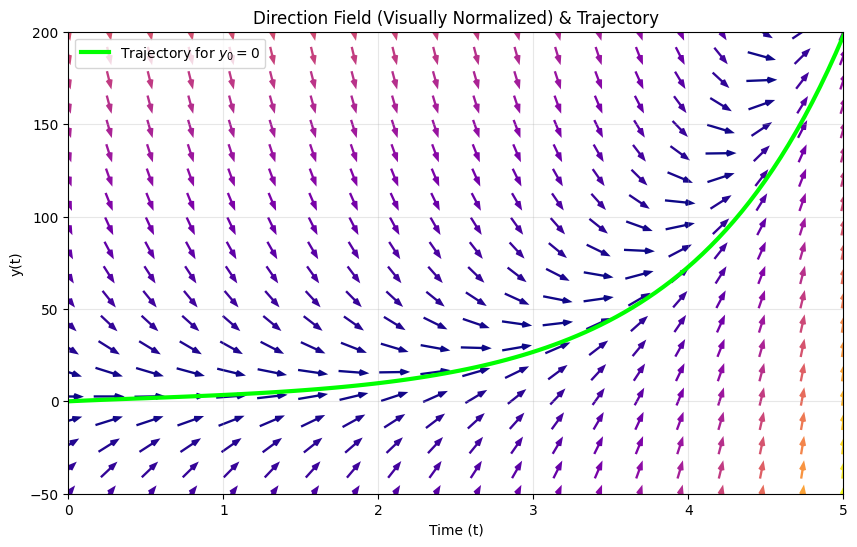

In [28]:
plt.figure(figsize=(10, 6))

# Ranges for the plot
t_min, t_max = 0, 5
y_min, y_max = -50, 200
t_range = t_max - t_min
y_range = y_max - y_min

# Create a grid for the vector field
t_grid = np.linspace(t_min, t_max, 20)
y_grid = np.linspace(y_min, y_max, 20)
t_mesh, y_mesh = np.meshgrid(t_grid, y_grid)

# Calculate the vector field at each grid point
dt_mesh, dy_mesh = system(t_mesh, y_mesh)

# VISUAL NORMALIZATION
M_visual = np.hypot(dt_mesh / t_range, dy_mesh / y_range)
M_visual[M_visual == 0] = 1.0  # Avoid division by zero

# Normalize components by this visual magnitude
dt_norm = dt_mesh / M_visual
dy_norm = dy_mesh / M_visual

plt.quiver(
    t_mesh,
    y_mesh,
    dt_norm,
    dy_norm,
    M_visual,  # Color by magnitude
    pivot="mid",
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=25,
    headwidth=3,
    headlength=4,
)

# Plot the specific trajectory
t_track = np.linspace(0, 5, 100)
y_lam = sp.lambdify(t, sol.rhs, "numpy")
y_track_vals = y_lam(t_track)

plt.plot(
    t_track,
    y_track_vals,
    "-",
    linewidth=3,
    label=f"Trajectory for $y_0={y0}$",
    color="lime",
)

plt.title("Direction Field (Visually Normalized) & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(t_min, t_max)
plt.ylim(y_min, y_max)
plt.show()